## Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [72]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.])

Best Strategy: best1bin
No of iterantions:  89


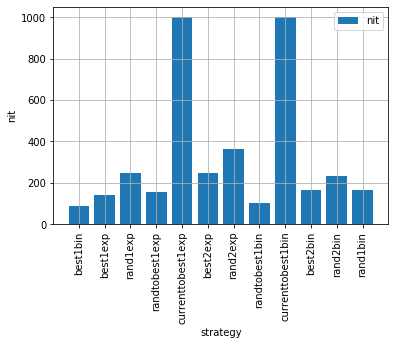

In [123]:
a = np.array(['best1bin', 'best1exp','rand1exp','randtobest1exp','currenttobest1exp','best2exp',
              'rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin'])
n = []

for i in range((len(a))):
    result = differential_evolution(ackley, bounds, seed=42, strategy = a[i])
#     print(result)

#     print('Strategy: ', a[i])
#     print('No of iterantions: ', result.nit)
    n.append(result.nit)
#     print('Best Strategy so far:', a[n.index(min(n))])
    
print('Best Strategy:', a[n.index(min(n))])  
print('No of iterantions: ', min(n))   

plt.bar(a,n,label="nit")
plt.grid(True)
plt.xlabel('strategy')
plt.xticks(rotation = 90)
plt.ylabel('nit')
plt.legend()

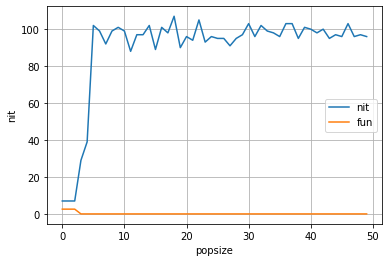

In [119]:
n = []
m = []

for i in range(0, 50, 1):
    result = differential_evolution(ackley, bounds, seed=42, popsize = i)
    n.append(result.nit)
    m.append(result.fun)
#     print('Min: ', result.fun)
#     print('Population: ', i)
#     print('No of iterantions: ', result.nit)

i = range(50)    
plt.plot(i,n,label="nit")
plt.plot(i,m,label="fun")
plt.grid(True)
plt.xlabel('popsize')
plt.ylabel('nit')
plt.legend()

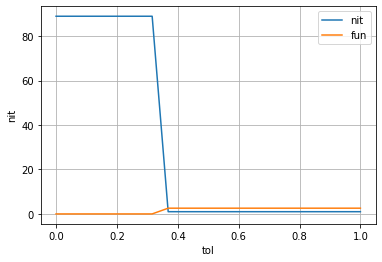

In [116]:
k = np.linspace(0,1,20)
n = []
m = []

for i in range(0,len(k)):
    result = differential_evolution(ackley, bounds, seed=42, tol = k[i])
    n.append(result.nit)
    m.append(result.fun)
#     print('Min: ', result.fun)
#     print('Tolerance: ', k[i])
#     print('No of iterantions: ', result.nit)

plt.plot(k,n,label="nit")
plt.plot(k,m,label="fun")
plt.grid(True)
plt.xlabel('tol')
plt.ylabel('nit')
plt.legend()

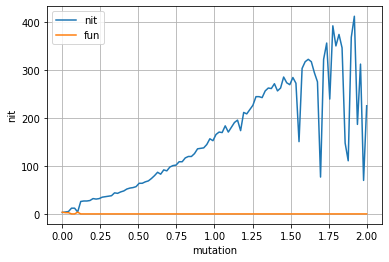

In [120]:
k = np.linspace(0,1.99999,100)
n = []
m = []

for i in range(0,len(k)):
    result = differential_evolution(ackley, bounds, seed=42, mutation = k[i])
    n.append(result.nit)
    m.append(result.fun)
#     print('Min: ', result.fun)
#     print('Mutation: ', k[i])
#     print('No of iterantions: ', result.nit)
    
plt.plot(k,n,label="nit")
plt.plot(k,m,label="fun")
plt.grid(True)
plt.xlabel('mutation')
plt.ylabel('nit')
plt.legend()

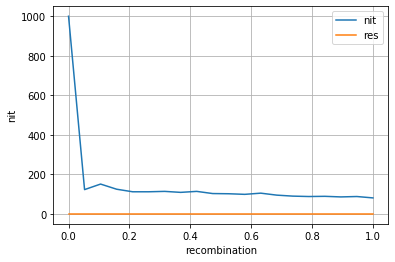

In [121]:
k = np.linspace(0,1,20)
n = []
m = []

for i in range(0,len(k)):
    result = differential_evolution(ackley, bounds, seed=42, recombination = k[i])
    n.append(result.nit)
    m.append(result.fun)
#     print('Min: ', result.fun)
#     print('Recombination: ', k[i])
#     print('No of iterantions: ', result.nit)
    
plt.plot(k,n,label="nit")
plt.plot(k,m,label="res")
plt.grid(True)
plt.xlabel('recombination')
plt.ylabel('nit')
plt.legend()

Min:  4.440892098500626e-16
Updating:  immediate
No of iterantions:  89
Min:  4.440892098500626e-16
Updating:  deferred
No of iterantions:  125


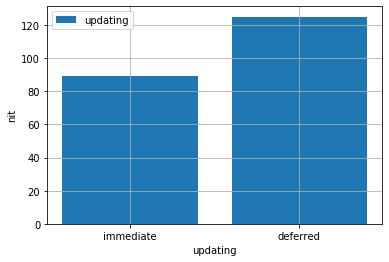

In [96]:
k = np.array(['immediate', 'deferred'])
n = []
m = []

for i in range(0,len(k)):
    result = differential_evolution(ackley, bounds, seed=42, updating = k[i])
    n.append(result.nit)
    m.append(result.fun)
    print('Min: ', result.fun)
    print('Updating: ', k[i])
    print('No of iterantions: ', result.nit)

plt.bar(k,n,label="updating")
# plt.bar(k,m,label="res")
plt.grid(True)
plt.xlabel('updating')
plt.ylabel('nit')
plt.legend()

In [114]:
'Дополнительное задание.'
'Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.'

# основываясь на проведенных выше тестах, удалось подобрать комбинацию параметров, 
# которая достаточно приближается к глобальному минимуму за 4 итерации

result = differential_evolution(ackley, bounds, seed=42, strategy = 'best1bin', popsize = 5, mutation = 0.1, recombination = 0.9)
result

     fun: 9.648705390219448e-09
     jac: array([0.98851878, 1.68596159])
 message: 'Optimization terminated successfully.'
    nfev: 317
     nit: 4
 success: True
       x: array([-3.19702838e-09, -1.19003972e-09])